## Machine Learning
### Clustering, Silhouette Coefficient

This notebook shows an example of how to calculate the Silhouette coefficient for different numbers of clusters to choose an appropriate number. It also shows how to create a Silhouette plot.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
import pickle

Pickle con las series históricas de los componentes del IBEX35

In [3]:
with open('../data/stock_data.pkl', 'rb') as handle:
    stock_data = pickle.load(handle)

In [4]:
close_dict = {ticker: df.close for ticker, df in stock_data.items()} 
close_data = pd.DataFrame(close_dict) 

Haremos clustering de las empresas del IBEX tomando 
como características la matriz de correlación de los rendimientos

In [5]:
close_df = close_data['2018-01-02':]

In [6]:
close_df = close_df.dropna(axis=1)
close_df

,ACS,ACX,AENA,AMS,ANA,BBVA,BKIA,BKT,CABK,CLNX,...,NTGY,REE,REP,SAB,SAN,SGRE,TEF,TL5,TRE,VIS
2018-01-02,30.631915,11.187460,157.189935,58.678844,65.693559,6.589719,3.731085,7.560662,3.682381,20.281101,...,18.661233,17.287374,14.157320,1.581069,5.072144,11.729081,7.773862,8.342296,25.995951,52.724945
2018-01-03,30.836096,11.367978,158.941611,58.951678,66.019820,6.600885,3.740319,7.571119,3.690727,20.323285,...,19.007853,17.296786,14.473711,1.601303,5.073074,11.649224,7.750136,8.370696,26.648872,53.014113
2018-01-04,31.804769,11.381864,161.707417,60.237897,67.555164,6.719057,3.794794,7.683298,3.761204,21.007602,...,19.420049,17.624664,14.856214,1.640359,5.243262,11.684162,7.872566,8.496718,26.793966,53.592449
2018-01-05,32.232125,11.377235,163.505190,61.874902,68.265261,6.748832,3.815106,7.738436,3.776968,21.063848,...,19.448153,17.976302,14.889269,1.661064,5.277671,11.808939,7.932358,8.723912,26.968078,54.459952
2018-01-08,31.956718,11.437408,164.334932,61.348722,68.188494,6.732083,3.789254,7.723226,3.776041,21.016977,...,19.401312,17.795731,14.898714,1.652594,5.293481,12.323022,7.943747,8.493168,27.026116,54.122590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-04,37.250000,8.400000,166.500000,68.000000,98.850000,5.010000,2.251000,6.474000,2.812000,30.320000,...,25.580000,18.805000,14.630000,1.012000,4.041500,14.305000,7.317000,6.368000,22.940000,45.180000
2019-06-05,37.400000,8.250000,169.750000,68.580000,100.600000,4.980000,2.262000,6.500000,2.713000,31.120000,...,25.750000,19.185000,14.535000,0.996400,4.011500,14.280000,7.394000,6.394000,23.020000,44.860000
2019-06-06,37.190000,8.296000,170.650000,69.400000,102.000000,4.944500,2.166000,6.320000,2.658000,31.140000,...,25.930000,19.440000,14.590000,0.946600,3.970500,14.300000,7.398000,6.360000,23.320000,44.920000
2019-06-07,37.300000,8.302000,172.500000,71.400000,102.100000,4.923000,2.177000,6.354000,2.616000,31.650000,...,25.900000,19.670000,14.660000,0.940400,3.964500,14.435000,7.470000,6.912000,23.580000,45.120000


In [7]:
stock_ret = np.log(close_df).diff()[1:]
stock_ret.head()

,ACS,ACX,AENA,AMS,ANA,BBVA,BKIA,BKT,CABK,CLNX,...,NTGY,REE,REP,SAB,SAN,SGRE,TEF,TL5,TRE,VIS
2018-01-03,0.006644,0.016007,0.011082,0.004639,0.004954,0.001693,0.002472,0.001382,0.002264,0.002078,...,0.018404,0.000544,0.022102,0.012716,0.000183,-0.006832,-0.003057,0.003398,0.024806,0.005469
2018-01-04,0.030930,0.001221,0.017252,0.021584,0.022990,0.017744,0.014459,0.014708,0.018915,0.033117,...,0.021454,0.018779,0.026084,0.024098,0.032997,0.002995,0.015674,0.014943,0.005430,0.010850
2018-01-05,0.013347,-0.000407,0.011056,0.026813,0.010457,0.004422,0.005339,0.007151,0.004183,0.002674,...,0.001446,0.019755,0.002223,0.012543,0.006541,0.010623,0.007566,0.026388,0.006477,0.016057
2018-01-08,-0.008581,0.005275,0.005062,-0.008540,-0.001125,-0.002485,-0.006799,-0.001968,-0.000246,-0.002228,...,-0.002411,-0.010096,0.000634,-0.005112,0.002991,0.042612,0.001435,-0.026806,0.002150,-0.006214
2018-01-09,0.005630,-0.004055,0.005036,0.011371,-0.015029,0.003725,0.002191,0.003686,0.017286,0.003117,...,-0.010192,-0.012629,0.001267,0.021131,0.001755,-0.003245,0.000358,-0.001464,0.016330,0.008865


In [8]:
corr_matrix = stock_ret.corr()
corr_matrix

,ACS,ACX,AENA,AMS,ANA,BBVA,BKIA,BKT,CABK,CLNX,...,NTGY,REE,REP,SAB,SAN,SGRE,TEF,TL5,TRE,VIS
ACS,1.000000,0.391236,0.408433,0.354753,0.341513,0.386367,0.359124,0.365058,0.377334,0.261484,...,0.309454,0.269639,0.429984,0.321789,0.507230,0.280389,0.445893,0.337815,0.299626,0.262254
ACX,0.391236,1.000000,0.280683,0.403551,0.176061,0.483730,0.386962,0.319123,0.376262,0.123701,...,0.169160,0.012178,0.407747,0.284563,0.491842,0.284497,0.307036,0.279923,0.384930,0.333338
AENA,0.408433,0.280683,1.000000,0.274812,0.364507,0.301511,0.230359,0.281251,0.240124,0.318334,...,0.366823,0.330812,0.294247,0.216935,0.383204,0.284979,0.342352,0.313296,0.220514,0.207054
AMS,0.354753,0.403551,0.274812,1.000000,0.258367,0.243320,0.198973,0.214156,0.162659,0.301949,...,0.255525,0.165808,0.419118,0.125621,0.293779,0.306192,0.286342,0.247649,0.312162,0.244711
ANA,0.341513,0.176061,0.364507,0.258367,1.000000,0.240907,0.246374,0.237497,0.159058,0.292672,...,0.428251,0.379152,0.366583,0.095462,0.305207,0.285399,0.335574,0.183081,0.302206,0.220965
BBVA,0.386367,0.483730,0.301511,0.243320,0.240907,1.000000,0.661950,0.596074,0.674727,0.059949,...,0.163206,0.071693,0.399021,0.617108,0.803752,0.238231,0.543802,0.250400,0.309864,0.080844
BKIA,0.359124,0.386962,0.230359,0.198973,0.246374,0.661950,1.000000,0.693298,0.732746,0.142251,...,0.172916,0.056938,0.407740,0.711499,0.711203,0.201829,0.439076,0.256691,0.303420,0.065646
BKT,0.365058,0.319123,0.281251,0.214156,0.237497,0.596074,0.693298,1.000000,0.676806,0.118907,...,0.209133,0.057308,0.364688,0.618849,0.693442,0.147291,0.421072,0.244569,0.237959,0.155967
CABK,0.377334,0.376262,0.240124,0.162659,0.159058,0.674727,0.732746,0.676806,1.000000,0.077354,...,0.152747,0.046410,0.412769,0.774921,0.718594,0.182689,0.388352,0.184390,0.245916,0.069200
CLNX,0.261484,0.123701,0.318334,0.301949,0.292672,0.059949,0.142251,0.118907,0.077354,1.000000,...,0.326489,0.286607,0.224037,0.106829,0.194327,0.175306,0.317603,0.256201,0.194184,0.196909


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [10]:
features = corr_matrix

Un bucle en el que cambiamos el número de clusters.  Hacemos el clustering y almacenamos el coeficiente de Silhouette

In [11]:
silhouette_avgs = dict()
for i_clusters in range(2, 15):
    kmeans = KMeans(n_clusters=i_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(features)
    silhouette_avgs[i_clusters] = silhouette_score(features, cluster_labels)

In [12]:
silh_by_clusters = pd.Series(silhouette_avgs)
silh_by_clusters

2     0.261079
3     0.254751
4     0.216402
5     0.224656
6     0.196069
7     0.223718
8     0.201745
9     0.200055
10    0.207078
11    0.211556
12    0.190499
13    0.222715
14    0.226230
dtype: float64

<AxesSubplot:>

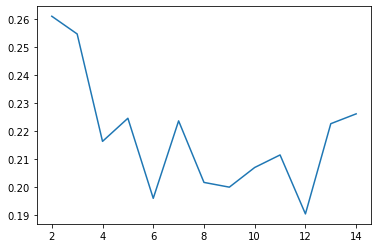

In [13]:
silh_by_clusters.plot()

#### El gráfico de Silhouette

In [14]:
n_clusters = 10

Cluster  0 : ['ACS', 'MAP', 'REP', 'TEF']
Cluster  1 : ['AENA', 'ANA', 'COL', 'FER', 'MRL']
Cluster  2 : ['AMS', 'CLNX', 'GRF']
Cluster  3 : ['IAG', 'MEL']
Cluster  4 : ['ELE', 'ENG', 'IBE', 'NTGY', 'REE']
Cluster  5 : ['ITX', 'SGRE']
Cluster  6 : ['BBVA', 'BKIA', 'BKT', 'CABK', 'SAB', 'SAN']
Cluster  7 : ['ACX', 'IDR', 'MTS', 'TRE']
Cluster  8 : ['TL5']
Cluster  9 : ['VIS']
silhouette: 0.2070781757729803



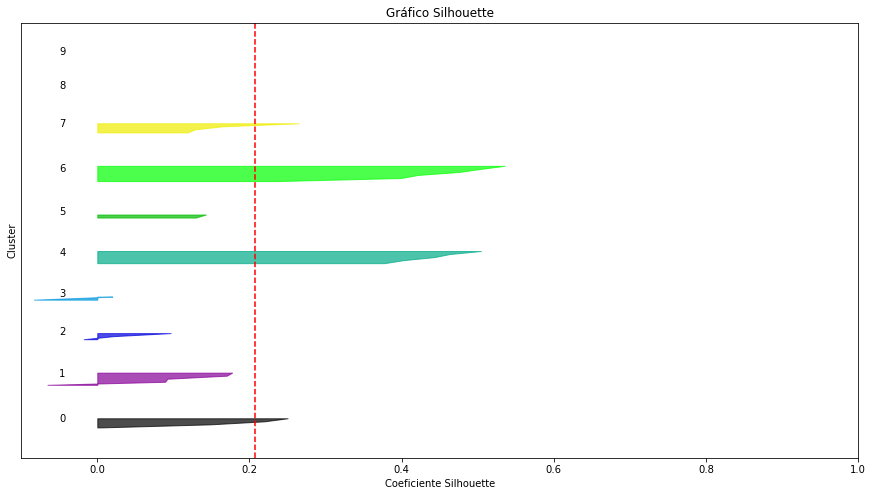

In [15]:
fig, ax1 = plt.subplots(figsize=(15,8))

# X Valores negativos bajos hasta 1.0
# Y Proporcional al numero de clusters y ejemplos
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, features.shape[0] + (n_clusters + 1) * 10])

kmeans = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = kmeans.fit_predict(features)

stock_labels = pd.Series(cluster_labels, index=features.columns)

# El dictionario con los grupos
for i in range(n_clusters):
        print("Cluster ",i,":",list(stock_labels[stock_labels == i].index))

silhouette_avg = silhouette_score(features, cluster_labels)

print("silhouette:", silhouette_avg)
print("")

# silhouette scores de cada ejemplo
silhouette_values = silhouette_samples(features, cluster_labels)

y_lower = 10

for i in range(n_clusters):
    # agrupar los silhouette scores del cluster y ordenar
    i_cluster_sil_values = silhouette_values[cluster_labels == i]
    i_cluster_sil_values.sort()

    size_cluster_i = i_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, i_cluster_sil_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("Gráfico Silhouette")
ax1.set_xlabel("Coeficiente Silhouette")
ax1.set_ylabel("Cluster")

# vertical donde cae el promedio 
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([]) 
plt.show()

____